In [53]:
import numpy as np
import evolution
from tqdm import tqdm
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#plt.rcParams['figure.dpi'] = 150  # ou 200

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Computer Modern par défaut
    "font.serif": ["Computer Modern"],  # Facultatif, plus explicite
    "axes.labelsize": 14,
    "font.size": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

Define the 2 nodes graph

In [10]:
G = np.array([[0., 1.], [1., 0.]])
print(G)

[[0. 1.]
 [1. 0.]]


Define the parameters

In [25]:
N = 1000 #length of the run
Epsilon = np.linspace(0., 0.5, 10000)
b = 0.3
a_period = (0.6, 1.) #everyone periodic
a_chaos = (1.2, 1.4) #everyone chaotic
a_mixed = (0.8, 1.15) #mixed config

In [26]:
param_period = np.array([[a_period[0], a_period[1]], [b, b]])
param_chaos = np.array([[a_chaos[0], a_chaos[1]], [b, b]])
param_mixed = np.array([[a_mixed[0], a_mixed[1]], [b, b]])

Initialize initial condition

In [27]:
x0 = np.array([.5, .5])
y0 = np.array([.5, .5])

Make the data

In [69]:
data_period_x, data_period_y = np.zeros((len(x0), N, len(Epsilon))), np.zeros((len(y0), N, len(Epsilon)))

In [70]:
data_chaos_x, data_chaos_y = np.zeros((len(x0), N, len(Epsilon))), np.zeros((len(y0), N, len(Epsilon)))

In [71]:
data_mixed_x, data_mixed_y = np.zeros((len(x0), N, len(Epsilon))), np.zeros((len(y0), N, len(Epsilon)))

In [72]:
for i in tqdm(range(len(Epsilon))):
    data_period_x[:, :, i], data_period_y[:, :, i] = evolution.evolution_vec(
        x0, y0, N, param_period, Epsilon[i], G
    )

100%|██████████| 10000/10000 [00:04<00:00, 2331.80it/s]


In [73]:
for i in tqdm(range(len(Epsilon))):
    data_chaos_x[:, :, i], data_chaos_y[:, :, i] = evolution.evolution_vec(
        x0, y0, N, param_chaos, Epsilon[i], G
    )

100%|██████████| 10000/10000 [00:04<00:00, 2413.87it/s]


In [74]:
for i in tqdm(range(len(Epsilon))):
    data_mixed_x[:, :, i], data_mixed_y[:, :, i] = evolution.evolution_vec(
        x0, y0, N, param_mixed, Epsilon[i], G
    )

100%|██████████| 10000/10000 [00:04<00:00, 2364.09it/s]


X and Y functions of time

In [60]:
np.shape(data_chaos_x)

(1000, 2, 10000)

In [58]:
Eps = 0.05
indexeps = np.where(Epsilon==Eps)[0]
print(indexeps)

[]


In [59]:
indexeps=500

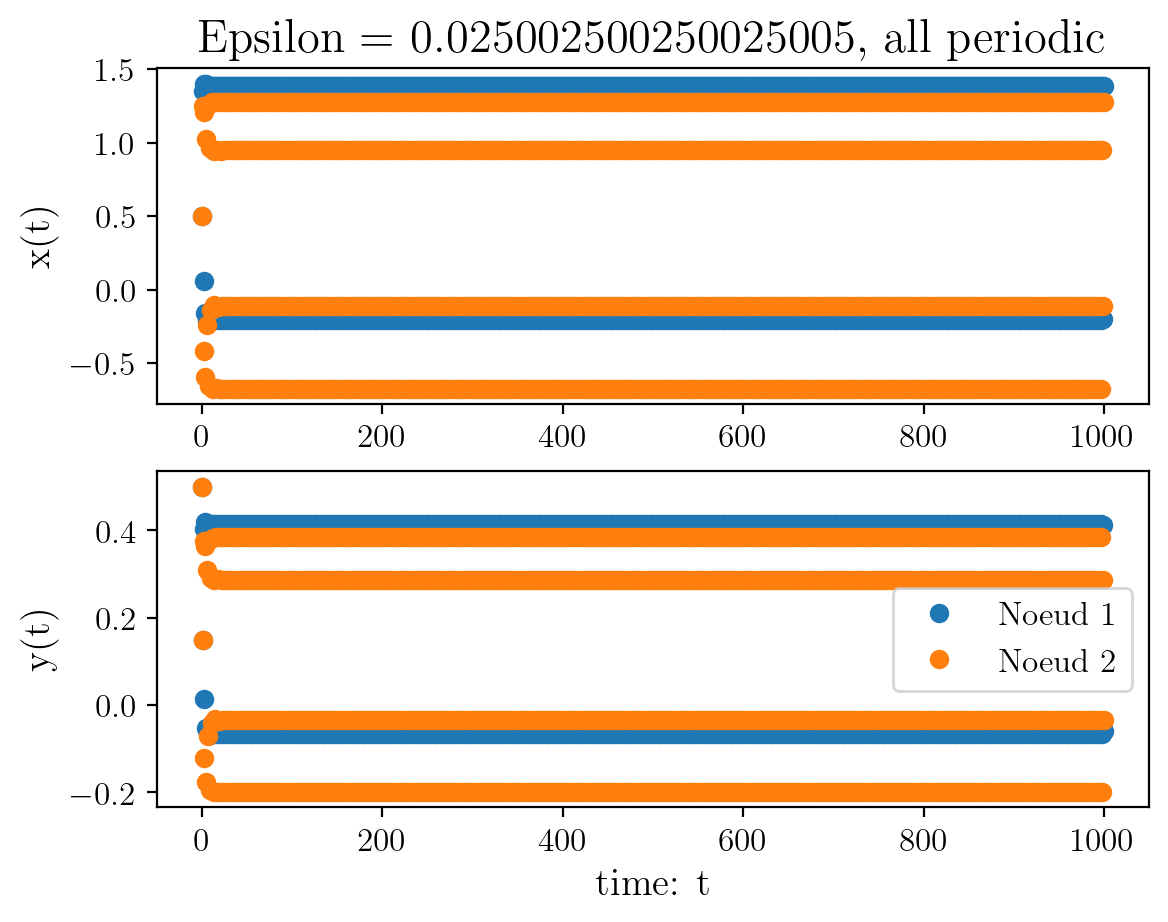

In [64]:
fig, ax = plt.subplots(2,1)
ax[0].plot(data_period_x[0, :, indexeps], 'o', label="Noeud 1")
ax[0].plot(data_period_x[1, :, indexeps], 'o', label="Noeud 2")
ax[1].set_xlabel("time: t")
ax[0].set_ylabel(r"x(t)")
ax[0].set_title(f"Epsilon = {Epsilon[indexeps]}, all periodic")
ax[1].plot(data_period_y[0, :, indexeps], 'o', label="Noeud 1")
ax[1].plot(data_period_y[1, :, indexeps], 'o', label="Noeud 2")
ax[1].set_ylabel(r"y(t)")

plt.legend()
plt.show()

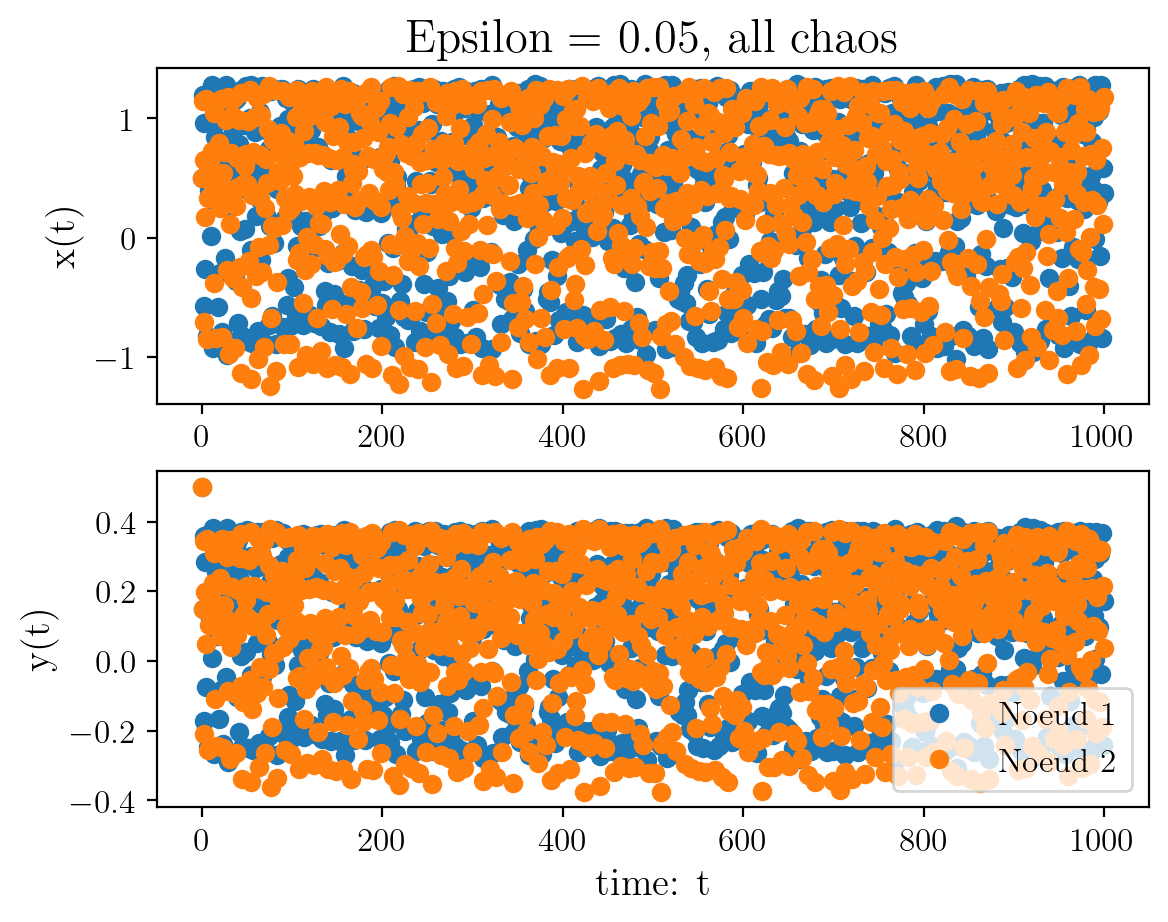

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(data_chaos_x[0, :, indexeps], 'o', label="Noeud 1")
ax[0].plot(data_chaos_x[1, :, indexeps], 'o', label="Noeud 2")
ax[1].set_xlabel("time: t")
ax[0].set_ylabel(r"x(t)")
ax[0].set_title(f"Epsilon = {Epsilon[indexeps]}, all chaos")
ax[1].plot(data_chaos_y[0, :, indexeps], 'o', label="Noeud 1")
ax[1].plot(data_chaos_y[1, :, indexeps], 'o', label="Noeud 2")
ax[1].set_ylabel(r"y(t)")
plt.legend()
plt.show()

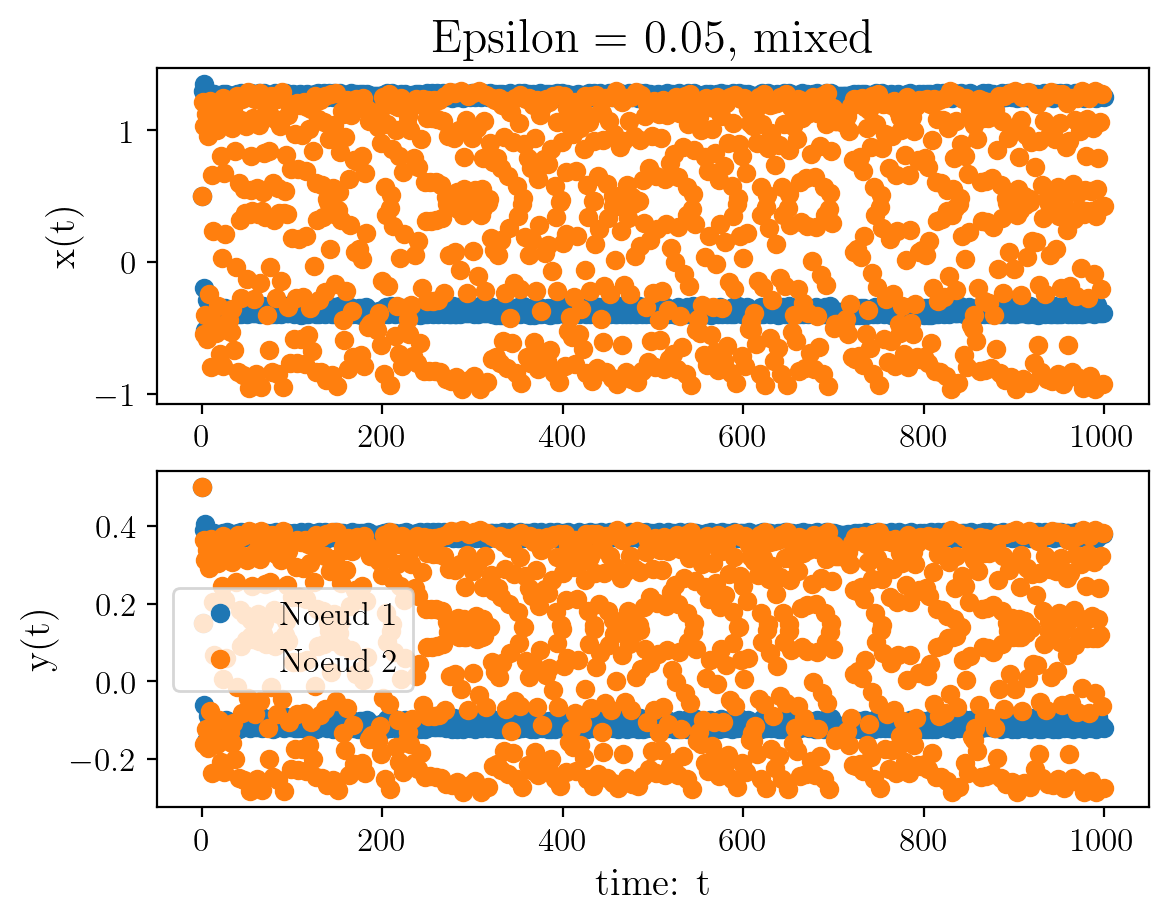

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(data_mixed_x[0, :, indexeps], 'o', label="Noeud 1")
ax[0].plot(data_mixed_x[1, :, indexeps], 'o', label="Noeud 2")
ax[1].set_xlabel("time: t")
ax[0].set_ylabel(r"x(t)")
ax[0].set_title(f"Epsilon = {Epsilon[indexeps]}, mixed")
ax[1].plot(data_mixed_y[0, :, indexeps], 'o', label="Noeud 1")
ax[1].plot(data_mixed_y[1, :, indexeps], 'o', label="Noeud 2")
ax[1].set_ylabel(r"y(t)")
plt.legend()
plt.show()

Try to plot the transitory regime with the coupling constant

The transition with MSD

In [75]:
msd_mixed_x, msd_mixed_y = np.zeros(len(Epsilon)), np.zeros(len(Epsilon))

In [76]:
msd_chaos_x, msd_chaos_y = np.zeros(len(Epsilon)), np.zeros(len(Epsilon))

In [77]:
msd_period_x, msd_period_y = np.zeros(len(Epsilon)), np.zeros(len(Epsilon))

In [ ]:
for i in tqdm(range(len(Epsilon))):
    msd_period_x[i], msd_period_y[i] = (
        evolution.MSD_vec(G, data_period_x[:, :, i]),
        evolution.MSD_vec(G, data_period_y[:, :, i]),
    )

100%|██████████| 10000/10000 [00:00<00:00, 39322.29it/s]


In [ ]:
for i in tqdm(range(len(Epsilon))):
    msd_mixed_x[i], msd_mixed_y[i] = (
        evolution.MSD_vec(G, data_mixed_x[:, :, i]),
        evolution.MSD_vec(G, data_mixed_y[:, :, i]),
    )

100%|██████████| 10000/10000 [00:00<00:00, 39187.24it/s]


In [ ]:
for i in tqdm(range(len(Epsilon))):
    msd_chaos_x[i], msd_chaos_y[i] = (
        evolution.MSD_vec(G, data_chaos_x[:, :, i]),
        evolution.MSD_vec(G, data_chaos_y[:, :, i]),
    )

100%|██████████| 10000/10000 [00:00<00:00, 36860.11it/s]


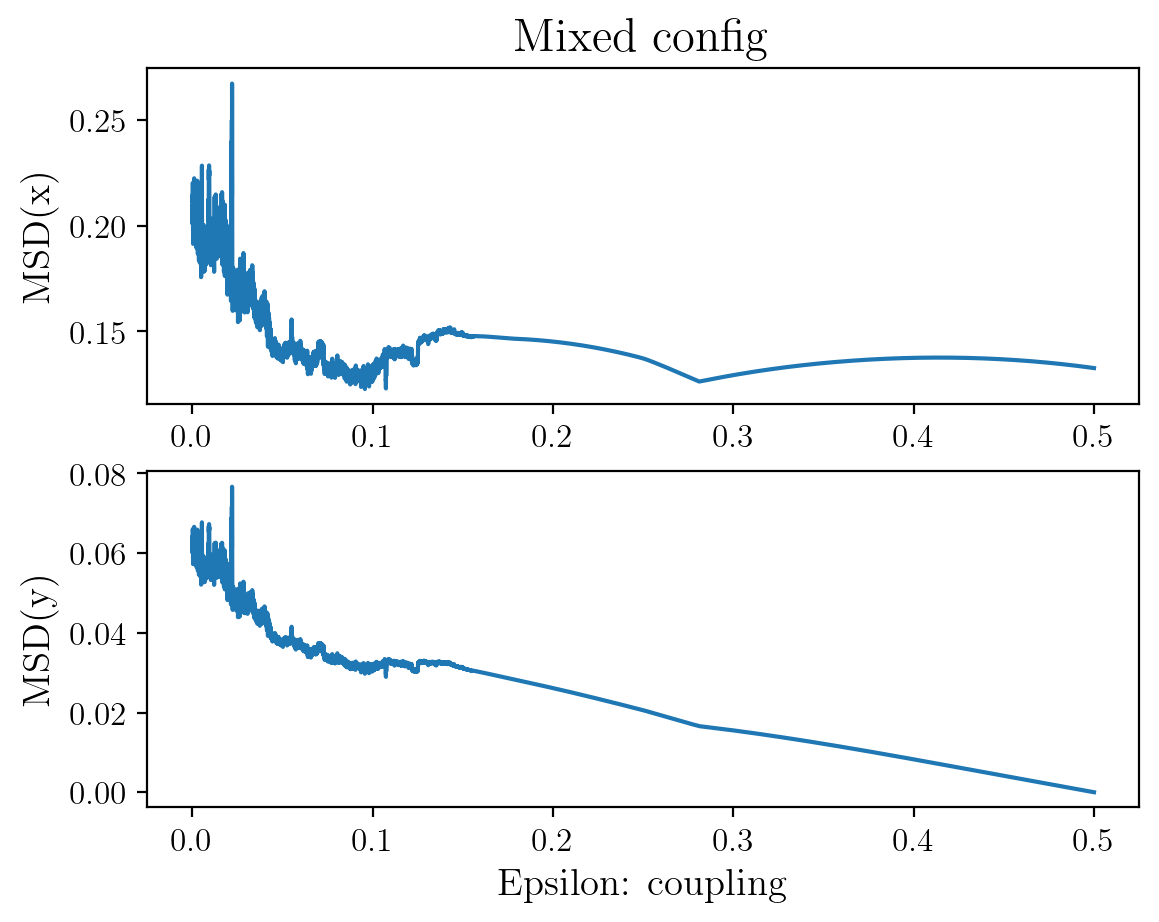

In [90]:
fig, ax = plt.subplots(2,1)
ax[0].plot(Epsilon,msd_mixed_x)
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD(x)")
ax[0].set_title("Mixed config")
ax[1].plot(Epsilon,msd_mixed_y)
ax[1].set_ylabel("MSD(y)")
plt.show()

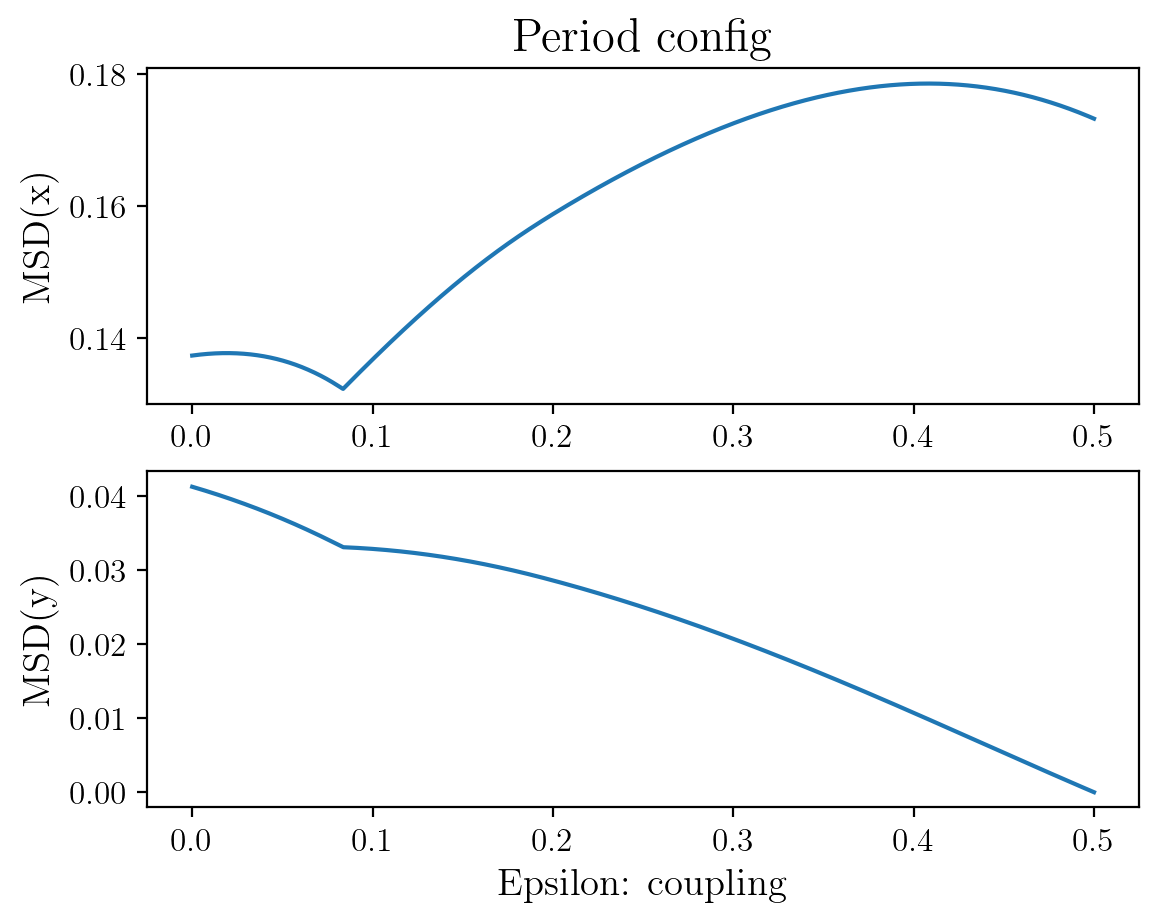

In [84]:
fig, ax = plt.subplots(2,1)
ax[0].plot(Epsilon,msd_period_x)
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD(x)")
ax[0].set_title("Period config")
ax[1].plot(Epsilon,msd_period_y)
ax[1].set_ylabel("MSD(y)")
plt.show()

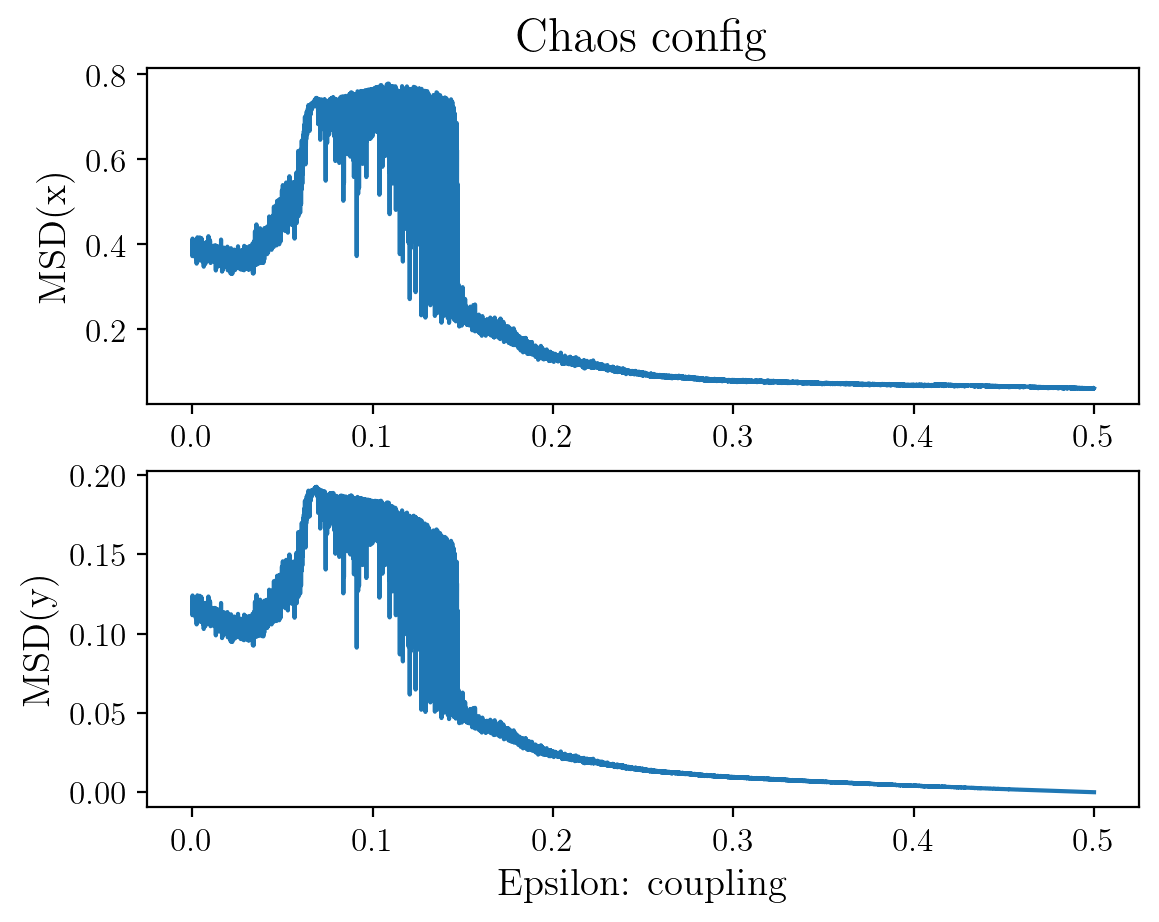

In [87]:
fig, ax = plt.subplots(2,1)
ax[0].plot(Epsilon,msd_chaos_x)
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD(x)")
ax[0].set_title("Chaos config")
ax[1].plot(Epsilon,msd_chaos_y)
ax[1].set_ylabel("MSD(y)")
plt.show()